In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

## Modelo univariado
variable x = LotArea, variable y = SalePrice

In [6]:
train_data=pd.read_csv("train.csv", encoding="latin1")
yTrain = train_data.pop("SalePrice") #La variable respuesta
xTrain = train_data.pop("LotArea") 

La separación entre train y test no es necesaria porque los datos ya fueron proporcionados de esa forma.

In [13]:
test_data=pd.read_csv("test.csv", encoding="latin1")
xTest = test_data.pop("LotArea") 

test_sample=pd.read_csv("sample_submission.csv", encoding="latin1")
yTest = test_sample.pop("SalePrice")

In [14]:
# EVALUANDO TRAIN Y TEST - Solo Selecciono una columna
price = yTrain.values.reshape(-1,1)
price_t = yTest.values.reshape(-1,1)
area = xTrain.values.reshape(-1,1)
area_t = xTest.values.reshape(-1,1)
lm = LinearRegression()
lm.fit(price, area)
price_pred = lm.predict(area_t)

### Ecuación

In [15]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]

label = r'price_pred = %0.4f*area % + 0.4f '%(m,c)
print(label)

price_pred = 0.0331*area +4519.3555 


Text(0.5, 1.0, 'Test Set Petal width vs Petal length')

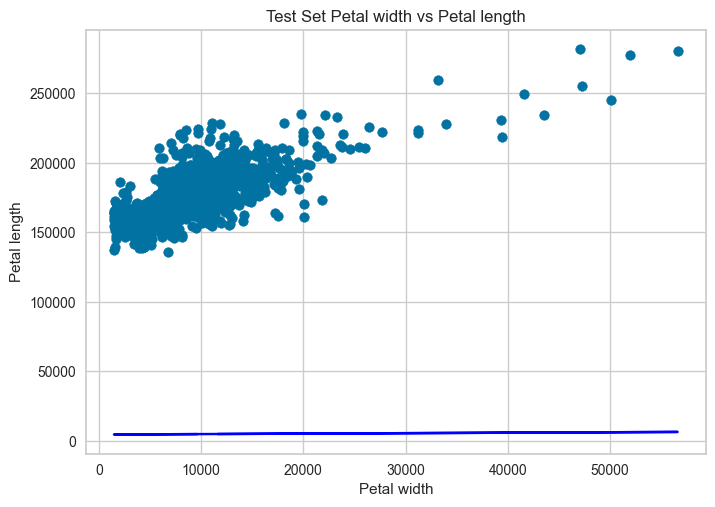

In [17]:
fig = plt.figure()
plt.scatter(area_t, price_t) # Valor teórico (test)
plt.plot(area_t, price_pred, color="blue") # valor predicho
plt.xlabel("Petal width")
plt.ylabel("Petal length")
plt.title("Test Set Petal width vs Petal length")

In [19]:
print("Mean Squared Error: %.2f"%mean_squared_error(price_t,price_pred))
print("R^2: %.2f"%r2_score(price_t,price_pred))

Mean Squared Error: 30662920528.85
R^2: -111.46


### Residuales

In [20]:
residuales = price_t - price_pred

for i in range(0,len(price_t)):
    print(price_t[i], price_pred[i], " --> ", "\t\tDIFF:",price_t[i] - price_pred[i])

[169277.0524984] [4904.62059158]  -->  		DIFF: [164372.43190682]
[187758.39398877] [4992.30139085]  -->  		DIFF: [182766.09259791]
[183583.68356955] [4977.81499793]  -->  		DIFF: [178605.86857163]
[179317.47751083] [4850.1225825]  -->  		DIFF: [174467.35492833]
[150730.0799765] [4685.26942]  -->  		DIFF: [146044.8105565]
[177150.98924731] [4850.85187459]  -->  		DIFF: [172300.13737272]
[172070.65922916] [4783.88960066]  -->  		DIFF: [167286.7696285]
[175110.95651955] [4797.87874898]  -->  		DIFF: [170313.07777057]
[162011.69883167] [4856.68621133]  -->  		DIFF: [157155.01262034]
[160726.24783142] [4797.8124497]  -->  		DIFF: [155928.43538172]
[157933.279456] [4713.5460634]  -->  		DIFF: [153219.73339261]
[145291.24502039] [4575.04686514]  -->  		DIFF: [140716.19815525]
[159672.01763182] [4575.04686514]  -->  		DIFF: [155096.97076668]
[164167.51830188] [4594.93664948]  -->  		DIFF: [159572.58165241]
[150891.63824405] [4594.93664948]  -->  		DIFF: [146296.70159457]
[179460.96518734] [494

In [21]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, price_pred)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = price_pred[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")


Índice: 728
Valor real: [281643.97611679]
Valor predicho: [6077.62062274]
Diferencia máxima: [275566.35549405]


Text(0, 0.5, 'Residuales')

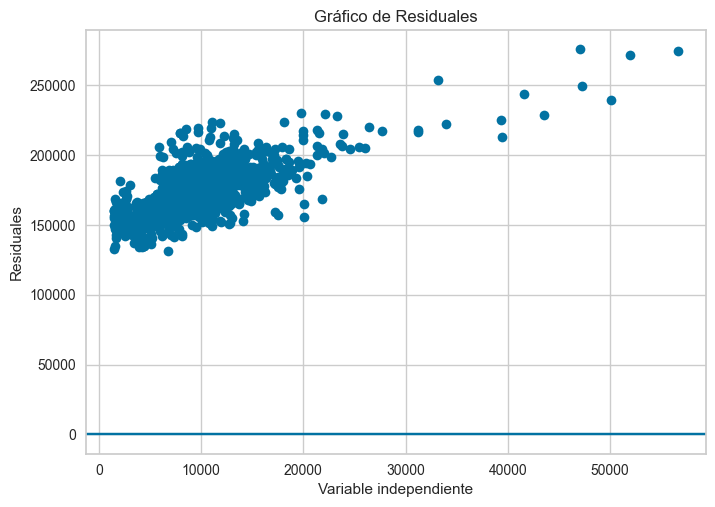

In [24]:
plt.plot(area_t,residuales, 'o')
plt.axhline(0)
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")


## Modelo multivariable